In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('https://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/6a8e5461-e748-45c6-aac6-432188d88dde/download/docentes.csv', sep=';')

In [14]:
ativos = df[df['vinculo'].str.contains('Ativo')].count() / df.shape[0]
print(f' ativos {ativos[0]*100} %, ou seja, {round(df.shape[0]*ativos[0])} docentes permanentes')

 ativos 85.77617328519855 %, ou seja, 2376 docentes permanentes


In [9]:
df['vinculo'].unique()

array(['Ativo Permanente', 'Cedido',
       'Cedido - Art 93, § 7º da Lei 8.112/90', 'Celetista',
       'Colaborador PCCTAE e Magistério Federal', 'Excedente de lotação',
       'Exercicio provisorio', 'Professor Substituto',
       'Professor Temporario', 'Professor Visitante'], dtype=object)

In [13]:
df.dtypes

siape                     int64
nome                     object
sexo                     object
formacao                 object
tipo_jornada_trabalho    object
vinculo                  object
categoria                object
classe_funcional         object
id_unidade_lotacao        int64
lotacao                  object
admissao                 object
dtype: object

In [23]:
df.drop('nome', axis=1, inplace=True) # remove e atualiza o df

In [24]:
df.describe(include='object')


sexo   formacao           tipo_jornada_trabalho           vinculo  \
count   2770       2770                            2770              2770   
unique     2          6                               3                10   
top        M  DOUTORADO  Dedicação exclusiva             Ativo Permanente   
freq    1492       2203                            2171              2376   

                               categoria  \
count                               2770   
unique                                 7   
top     PROFESSOR DO MAGISTERIO SUPERIOR   
freq                                2200   

                                         classe_funcional  \
count                                                2770   
unique                                                 18   
top     Classe D - Associado                          ...   
freq                                                  836   

                           lotacao                       admissao  
count                         2770                           2770  
unique                         135                           1400  
top     ESCOLA AGRÍCOLA DE JUNDIAÍ  2009/01/27 00:00:00.000000000  
freq                           120                             80

In [15]:
df.sexo.unique() #equivalente ao distinct no mongodb

array(['F', 'M'], dtype=object)

In [26]:
print(df['sexo'].where(df['sexo'] == 'false').count()) # duas formas de localizar
print(df[df['sexo']=='false'].value_counts())

# combinando filtros exemplo
# making boolean series for a team name
#filter1 = data["Team"]=="Atlanta Hawks"
  
# making boolean series for age
#filter2 = data["Age"]>24
  
# filtering data on basis of both filters
#data.where(filter1 & filter2, inplace = True)

0
Series([], dtype: int64)


In [16]:
df2 = df.groupby('sexo')
g = df2.ngroups
g

2

1278
1492


<BarContainer object of 2 artists>

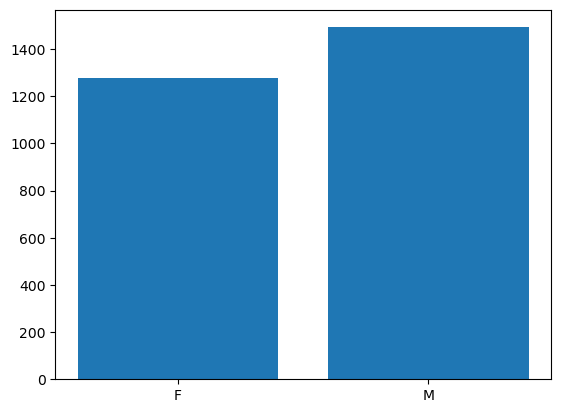

In [17]:
fc = df2.get_group('F').count() #acessa pelo rótulo da coluna
mc = df2.get_group('M').count()
print(fc[0])
print(mc[0])
import matplotlib.pyplot as plt
plt.bar(['F', 'M'], [fc[0], mc[0]])

Gender balance professores@UFRN:

In [18]:
fgb = fc[0]/(fc[0]+mc[0])*100
mgb = mc[0]/(fc[0]+mc[0])*100
print('F: ' + str(fgb) + ' %')
print('M: ' + str(mgb) + ' %')

F: 46.13718411552347 %
M: 53.86281588447653 %


In [19]:
df3 = df.groupby('lotacao')
df3.ngroups

135

In [20]:
df3.get_group('ESCOLA AGRÍCOLA DE JUNDIAÍ').count()

siape                    120
nome                     120
sexo                     120
formacao                 120
tipo_jornada_trabalho    120
vinculo                  120
categoria                120
classe_funcional         120
id_unidade_lotacao       120
lotacao                  120
admissao                 120
dtype: int64

## 1 - Exiba as colunas lotacao e o valor total de docentes em cada lotacao, ordenados do maior para o menor

In [21]:
# por padrão value_counts já retorna a lista de frequências em ordem descendente
n_docentes_lotacao = df['lotacao'].value_counts()
# como a exibição por default é truncada, pode-se controlar o número a exibir
pd.set_option('display.max_rows', 140)
n_docentes_lotacao
# mais opções em https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html

ESCOLA AGRÍCOLA DE JUNDIAÍ                                              120
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA                       107
ESCOLA DE CIÊNCIAS E TECNOLOGIA                                         104
ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE             75
DEPARTAMENTO DE ODONTOLOGIA                                              73
ESCOLA DE MÚSICA                                                         70
DEPARTAMENTO DE LETRAS                                                   57
INSTITUTO METROPOLE DIGITAL                                              56
FACULDADE DE ENGENHARIA, LETRAS E CIÊNCIAS SOCIAIS DO SERIDÓ - FELCS     56
INSTITUTO DE QUÍMICA                                                     55
NÚCLEO DE EDUCAÇÃO DA INFÂNCIA                                           52
DEPARTAMENTO DE PRÁTICAS EDUCACIONAIS E CURRÍCULO                        50
DEPARTAMENTO DE FUNDAMENTOS E POLÍTICAS DA EDUCAÇÃO                      50
DEPARTAMENTO

## 2 - Exiba o gender balance em cada unidade de lotacao

In [22]:
df3.ngroups

135

In [33]:
#df3 = df.groupby('lotacao').agg(lambda x: ','.join(x)) # transforma DataFrameGroupBy em DataFrame
# outra opção é pelo get_group...
#print(df3)

# Lista de índeces, ou seja, de lotações (string)
for index_row in (n_docentes_lotacao.index): 
    #filterF = df['sexo'] == 'F' 
    #filterV = df['vinculo'] == 'Ativo Permanente'
    
    df4 = df.loc[(df['lotacao'] == index_row) & (df['sexo'] == 'F') & (df['vinculo'] == 'Ativo Permanente'),'vinculo']
    # celulas que não atendem, where retorna NaN, então vamos excluir estas linhas
    df4.dropna(how='all', inplace=True)
    f = df4.shape[0]
    
    #filterM = df['sexo'] == 'M' 
    df5= df.loc[(df['lotacao'] == index_row) & (df['sexo'] == 'M') & (df['vinculo'] == 'Ativo Permanente'),'vinculo']
    df5.dropna(how='all', inplace=True)
    m = df5.shape[0]
    
    print('Gender balance na Lotação: ' + index_row)
    print('----------------------------------------')
    print(f'F (%): {(f/(f+m))*100:.2f}')
    print(f'M (%): {(m/(f+m))*100:.2f}')
    print('sendo: ' + str(f) + ' professoras e ' + str(m) + ' professores')
    print('----------------------------------------\n')
    
        
    

Gender balance na Lotação: ESCOLA AGRÍCOLA DE JUNDIAÍ
----------------------------------------
F (%): 41.67
M (%): 58.33
sendo: 45 professoras e 63 professores
----------------------------------------

Gender balance na Lotação: FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA
----------------------------------------
F (%): 69.33
M (%): 30.67
sendo: 52 professoras e 23 professores
----------------------------------------

Gender balance na Lotação: ESCOLA DE CIÊNCIAS E TECNOLOGIA
----------------------------------------
F (%): 30.77
M (%): 69.23
sendo: 28 professoras e 63 professores
----------------------------------------

Gender balance na Lotação: ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE
----------------------------------------
F (%): 48.39
M (%): 51.61
sendo: 30 professoras e 32 professores
----------------------------------------

Gender balance na Lotação: DEPARTAMENTO DE ODONTOLOGIA
----------------------------------------
F (%): 59.26
M (%): 40.74
sendo: 3

Gender balance na Lotação: PRÓ-REITORIA DE PESQUISA
----------------------------------------
F (%): 100.00
M (%): 0.00
sendo: 2 professoras e 0 professores
----------------------------------------

Gender balance na Lotação: SECRETARIA DE INCLUSÃO E ACESSIBILIDADE- SIA
----------------------------------------
F (%): 50.00
M (%): 50.00
sendo: 1 professoras e 1 professores
----------------------------------------

Gender balance na Lotação: EDITORA UNIVERSITÁRIA
----------------------------------------
F (%): 100.00
M (%): 0.00
sendo: 2 professoras e 0 professores
----------------------------------------

Gender balance na Lotação: CENTRO DE CIÊNCIAS DA SAÚDE
----------------------------------------
F (%): 0.00
M (%): 100.00
sendo: 0 professoras e 2 professores
----------------------------------------

Gender balance na Lotação: NUCLEO DE PESQUISA EM ALIMENTOS E MEDICAMENTOS
----------------------------------------
F (%): 50.00
M (%): 50.00
sendo: 1 professoras e 1 professores
----------

ZeroDivisionError: division by zero